In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 300

In [59]:
np.random.seed(1)
actions = ['left','right']
q_table = pd.DataFrame(data=[[1000,1000]], columns=actions, dtype=float)
left_para = [700, 100]
right_para = [600, 50]
q_table

,left,right
0,1000.0,1000.0


In [60]:
def choose_action(step, q_table, EPSILON=0.9):
    if np.random.uniform() > EPSILON or step == 0:
        action = np.random.choice(q_table.columns)
    else:
        state_value = q_table.loc[step, :]
        action = state_value.idxmax()
    return action

In [61]:
def run_one_step(step, action, q_table, left_para, right_para):
    state_value = q_table.loc[step, :].copy()
    if action == 'left':
        mu, sigma = left_para
        left_value = np.random.normal(mu, sigma)
        value = state_value['left'].copy()
        state_value['left'] += (left_value - value) / (step + 1)
    else:
        mu, sigma = right_para
        right_value = np.random.normal(mu, sigma)
        value = state_value['right'].copy()
        state_value['right'] += (right_value - value) / (step + 1)
    step += 1
    q_table.loc[step, :] = state_value
    return  step



In [62]:
def run(q_table, maxsteps=1000):
    step = 0
    while step < maxsteps:
        action = choose_action(step, q_table)
        step = run_one_step(step, action, q_table, left_para, right_para)
    print(q_table)
    

In [63]:
if __name__ == '__main__' :
    run(q_table)

             left        right
0     1000.000000  1000.000000
1      539.827900  1000.000000
2      539.827900   763.054261
3      651.378992   763.054261
4      651.378992   712.775609
...           ...          ...
996    696.278040   628.611879
997    696.372672   628.611879
998    696.523263   628.611879
999    696.636765   628.611879
1000   696.712258   628.611879

[1001 rows x 2 columns]


[]

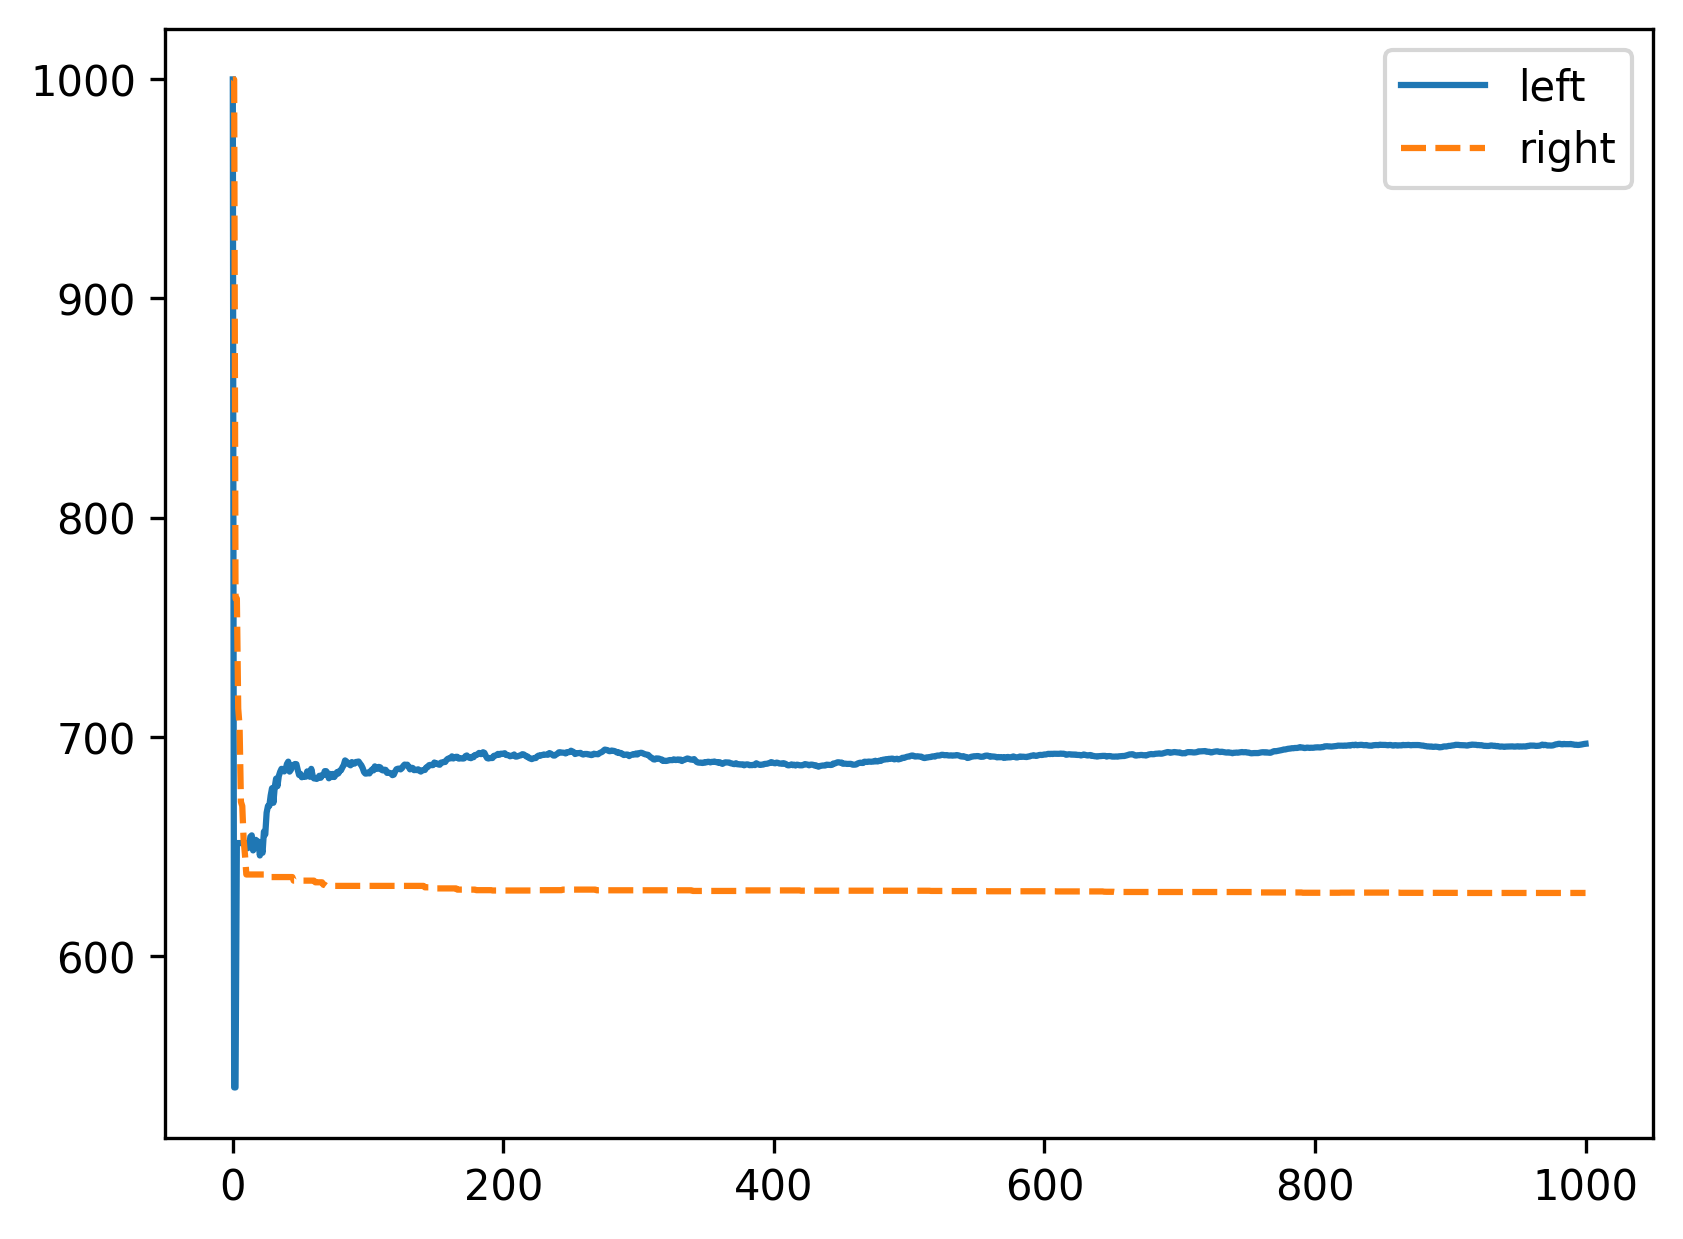

In [64]:
plt.Figure(figsize=(12,9))
sns.lineplot(data=q_table)
plt.plot()